<a href="https://colab.research.google.com/github/tranquil-morning/CA-deeplearning/blob/main/02_Fashion_MNIST_(Convolutional_Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.fashion_mnist.load_data()

In [6]:
train_X.shape

(60000, 28, 28)

In [7]:
train_y.shape

(60000,)

In [18]:
train_X = train_X.reshape((60000, 28, 28, 1))
test_X = test_X.reshape((10000, 28, 28, 1))

In [8]:
label = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "AnkleBoot"]

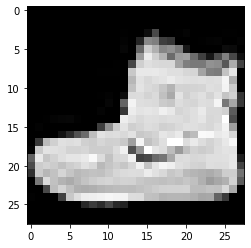

In [9]:
plt.imshow(train_X[0])
plt.gray()

In [12]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation = tf.keras.activations.relu, input_shape = (28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D((2, 2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation =  tf.keras.activations.relu),
                                    tf.keras.layers.Dense(128, activation = tf.keras.activations.relu),
                                    tf.keras.layers.Dense(64, activation = tf.keras.activations.relu),

                                    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
                                    
])

In [13]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 64)                401472    
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                        

In [15]:
model.fit(train_X, train_y, epochs = 5, verbose = 1)

Epoch 1/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0831 - accuracy: 0.9714
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0897 - accuracy: 0.9707
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0799 - accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0786 - accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0768 - accuracy: 0.9744


In [19]:
model.evaluate(test_X, test_y)

313/313 [==============================] - 2s 7ms/step - loss: 0.6438 - accuracy: 0.8939


[0.643800675868988, 0.8938999772071838]